# Multiple linear regression
determine whether an e-commerce company should focus on website use or mobile app use based on how much earned from the ecommerce use
y is the amount earned by company
x are all the features given

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("Ecommerce Customers.csv")
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [3]:
df.shape

(500, 8)

In [4]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


# Data exploration

Text(0, 0.5, 'Yearly Amount Spent')

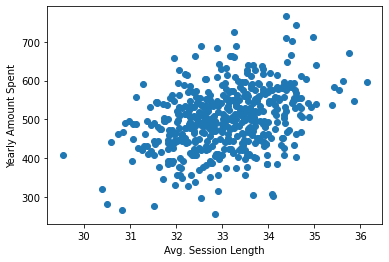

In [5]:
import matplotlib.pyplot as plt

plt.scatter(df['Avg. Session Length'], df['Yearly Amount Spent'])
plt.xlabel("Avg. Session Length")
plt.ylabel("Yearly Amount Spent")

Text(0, 0.5, 'Yearly Amount Spent')

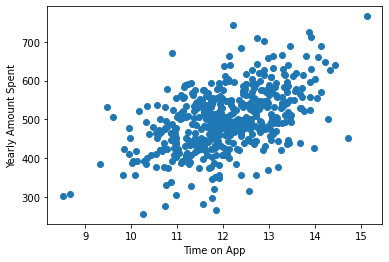

In [6]:
plt.scatter(df['Time on App'], df['Yearly Amount Spent'])
plt.xlabel("Time on App")
plt.ylabel("Yearly Amount Spent")

Text(0, 0.5, 'Yearly Amount Spent')

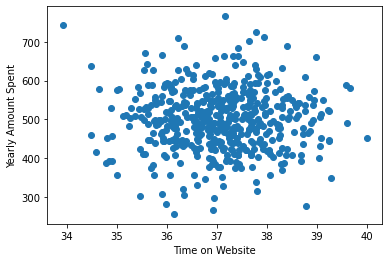

In [7]:
plt.scatter(df['Time on Website'], df['Yearly Amount Spent'])
plt.xlabel("Time on Website")
plt.ylabel("Yearly Amount Spent")

Text(0, 0.5, 'Yearly Amount Spent')

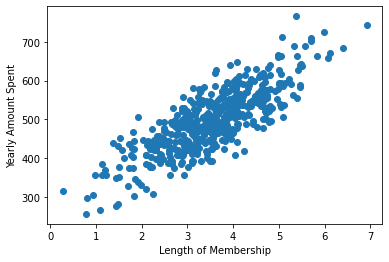

In [8]:
plt.scatter(df['Length of Membership'], df['Yearly Amount Spent'])
plt.xlabel("Length of Membership")
plt.ylabel("Yearly Amount Spent")

# Train and test data split

In [9]:
features = ['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership' ] 
X = df[features]
y = df["Yearly Amount Spent"]


In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 20)

In [11]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x_train, y_train)
prediction = clf.predict(x_test)

In [12]:
coeff = clf.coef_

In [13]:
clf.score(x_train, y_train)

0.9857728364207604

In [14]:
clf.score(x_test, y_test)

0.9795502848322655

# Explore the results

Text(0.5, 1.0, 'Yearly Amount Spent')

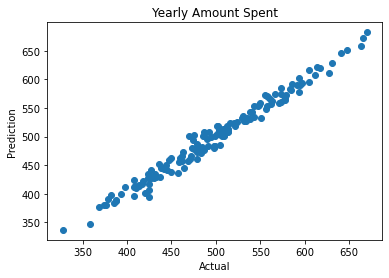

In [15]:
plt.scatter(y_test, prediction)
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.title("Yearly Amount Spent")

# Evaluating the model

In [16]:
from sklearn import metrics
MAE = metrics.mean_absolute_error(y_test, prediction)
MSE = metrics.mean_squared_error(y_test, prediction)
RMSE = np.sqrt(MSE)

In [17]:
print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)

MAE:  8.061417104589815
MSE:  103.35503771683675
RMSE:  10.166367970757145


In [19]:
coeff_table = pd.DataFrame(coeff, features , columns = ['coefficients'])

In [20]:
coeff_table

,coefficients
Avg. Session Length,25.626697
Time on App,38.555160
Time on Website,0.762362
Length of Membership,61.926552


# Observations
